In [1]:
import pandas as pd
import numpy as np

In [2]:
from atrax import Atrax as tx

In [3]:
from araxia.network import MLP
from araxia.preprocessing import create_lagged_dataset, create_dataset_with_cyclic_features
from araxia.train import normalize_features, normalize_targets, NormalizeFeatures
from araxia.utils import train_test_split
from araxia.metrics import MAPE

In [4]:
ds = tx.read_csv('sales.csv')

In [5]:
ds.info()

<class 'Dataset'>
Range Index: 484 entries
Data columns (total 2 columns):
Column          | Dtype      | Non-Null   | Total     
--------------------------------------------------
sale_date       | str        | 484        | 484       
sales           | float      | 484        | 484       


In [6]:
ds.head()

,sale_date,sales
0,2024-02-22,26794.409999999712
1,2024-02-23,32036.07999999969
2,2024-02-24,27247.96999999973
3,2024-02-25,32901.659999999705
4,2024-02-26,24476.209999999744


## V1

In [6]:
X_raw, y_raw = create_lagged_dataset(ds, 'sale_date', 'sales', lag=5)

In [7]:
nf = NormalizeFeatures(X_raw)
X_norm = nf.normalize()

In [8]:
X_norm, X_mean, X_std = normalize_features(X_raw)

In [9]:
y_norm = normalize_targets(y_raw)
#

y_max=67972.8600000019, y_min=352.98, 


In [10]:
X_train, y_train, X_test, y_test = train_test_split(X_norm, y_norm, test_size=0.2)

In [11]:
mlp = MLP(input_size=5, hidden_size=10, learning_rate=0.001)
mlp.train(X_train, y_train, epochs=300)

epoch: 0, | loss: 0.031522
epoch: 10, | loss: 0.009529
epoch: 20, | loss: 0.009340
epoch: 30, | loss: 0.009202
epoch: 40, | loss: 0.009098
epoch: 50, | loss: 0.009020
epoch: 60, | loss: 0.008958
epoch: 70, | loss: 0.008909
epoch: 80, | loss: 0.008870
epoch: 90, | loss: 0.008838
epoch: 100, | loss: 0.008812
epoch: 110, | loss: 0.008790
epoch: 120, | loss: 0.008772
epoch: 130, | loss: 0.008756
epoch: 140, | loss: 0.008743
epoch: 150, | loss: 0.008732
epoch: 160, | loss: 0.008722
epoch: 170, | loss: 0.008714
epoch: 180, | loss: 0.008707
epoch: 190, | loss: 0.008701
epoch: 200, | loss: 0.008695
epoch: 210, | loss: 0.008691
epoch: 220, | loss: 0.008687
epoch: 230, | loss: 0.008683
epoch: 240, | loss: 0.008680
epoch: 250, | loss: 0.008677
epoch: 260, | loss: 0.008674
epoch: 270, | loss: 0.008672
epoch: 280, | loss: 0.008670
epoch: 290, | loss: 0.008668


#### test the model

In [12]:
y_preds = mlp.predict(X_test)

In [30]:
y_preds

[np.float64(0.4206608175861078),
 np.float64(0.45819392191429714),
 np.float64(0.45825647058961),
 np.float64(0.4523053533595403),
 np.float64(0.4368371951822573),
 np.float64(0.45524373417029707),
 np.float64(0.4549103960153524),
 np.float64(0.43883781334667127),
 np.float64(0.44472822794985256),
 np.float64(0.4500148085272537),
 np.float64(0.46210545566488903),
 np.float64(0.43316656373295),
 np.float64(0.45777274844955795),
 np.float64(0.4528809768236189),
 np.float64(0.4449208787811754),
 np.float64(0.4440636504512106),
 np.float64(0.444850026871217),
 np.float64(0.4729878568563372),
 np.float64(0.4294965300207459),
 np.float64(0.454557052372989),
 np.float64(0.4701653014194438),
 np.float64(0.43466402476632165),
 np.float64(0.4594113017433613),
 np.float64(0.4575626346002396),
 np.float64(0.45452317263371467),
 np.float64(0.43561873316001376),
 np.float64(0.46238060687323757),
 np.float64(0.46306001833408295),
 np.float64(0.43675684232371037),
 np.float64(0.4420930168016045),
 np.

## testing

In [13]:
y_min = y_raw.min()
y_max = y_raw.max()


In [14]:
y_pred_denormalized = [pred * (y_max- y_min) + y_min for pred in y_preds]

In [15]:
y_pred_denormalized

[np.float64(28938.92497752212),
 np.float64(31566.535808514614),
 np.float64(31114.473021164456),
 np.float64(30823.04716826747),
 np.float64(29789.84898204795),
 np.float64(31045.390854032466),
 np.float64(30751.75982753882),
 np.float64(30012.96700831046),
 np.float64(30528.169130924565),
 np.float64(30817.097264420187),
 np.float64(31511.025040543474),
 np.float64(29587.5470130527),
 np.float64(31295.62481358844),
 np.float64(30632.46398097124),
 np.float64(30405.701580591274),
 np.float64(30429.610921642066),
 np.float64(30522.482535473107),
 np.float64(32245.555256184187),
 np.float64(29415.696014677018),
 np.float64(31369.344038809973),
 np.float64(31985.76534302682),
 np.float64(29808.31253069416),
 np.float64(31503.918372667817),
 np.float64(31112.5980728663),
 np.float64(31107.783697843803),
 np.float64(29914.121360574154),
 np.float64(31633.04670323921),
 np.float64(31233.076000676694),
 np.float64(29827.778804403057),
 np.float64(30302.339936796463),
 np.float64(31913.506445

In [16]:
n = X_norm.shape[0]
stop = int(n - (n * .2))
stop

383

In [35]:
len(X_norm)

479

In [36]:
479-383


96

In [37]:
type(ds)

atrax.Dataset.dataset.Dataset

In [35]:
ds.head()

,sale_date,sales,day_of_week,is_weekend,day_of_month,month
0,2024-02-22 00:00:00,26794.409999999712,3,0,22,2
1,2024-02-23 00:00:00,32036.07999999969,4,0,23,2
2,2024-02-24 00:00:00,27247.96999999973,5,1,24,2
3,2024-02-25 00:00:00,32901.659999999705,6,1,25,2
4,2024-02-26 00:00:00,24476.209999999744,0,0,26,2


In [39]:
#test_dates = df.iloc[stop:, :1]

In [ ]:
#test_dates = [d.strftime('%m/%d/%Y') for d in ds.iloc[stop+5:, :1]['sale_date'].to_list()]

In [17]:
test_dates = [d for d in ds.iloc[stop+5:, :1]['sale_date'].to_list()]

In [18]:
test_values = ds.iloc[stop+5:, :2]['sales'].to_list()

In [41]:
type(test_dates)

list

In [42]:
len(test_dates)

96

In [45]:
test_dates

[datetime.datetime(2025, 3, 16, 0, 0),
 datetime.datetime(2025, 3, 17, 0, 0),
 datetime.datetime(2025, 3, 18, 0, 0),
 datetime.datetime(2025, 3, 19, 0, 0),
 datetime.datetime(2025, 3, 20, 0, 0),
 datetime.datetime(2025, 3, 21, 0, 0),
 datetime.datetime(2025, 3, 22, 0, 0),
 datetime.datetime(2025, 3, 23, 0, 0),
 datetime.datetime(2025, 3, 24, 0, 0),
 datetime.datetime(2025, 3, 25, 0, 0),
 datetime.datetime(2025, 3, 26, 0, 0),
 datetime.datetime(2025, 3, 27, 0, 0),
 datetime.datetime(2025, 3, 28, 0, 0),
 datetime.datetime(2025, 3, 29, 0, 0),
 datetime.datetime(2025, 3, 30, 0, 0),
 datetime.datetime(2025, 3, 31, 0, 0),
 datetime.datetime(2025, 4, 1, 0, 0),
 datetime.datetime(2025, 4, 2, 0, 0),
 datetime.datetime(2025, 4, 3, 0, 0),
 datetime.datetime(2025, 4, 4, 0, 0),
 datetime.datetime(2025, 4, 5, 0, 0),
 datetime.datetime(2025, 4, 6, 0, 0),
 datetime.datetime(2025, 4, 7, 0, 0),
 datetime.datetime(2025, 4, 8, 0, 0),
 datetime.datetime(2025, 4, 9, 0, 0),
 datetime.datetime(2025, 4, 10, 0,

In [19]:
import matplotlib.pyplot as plt

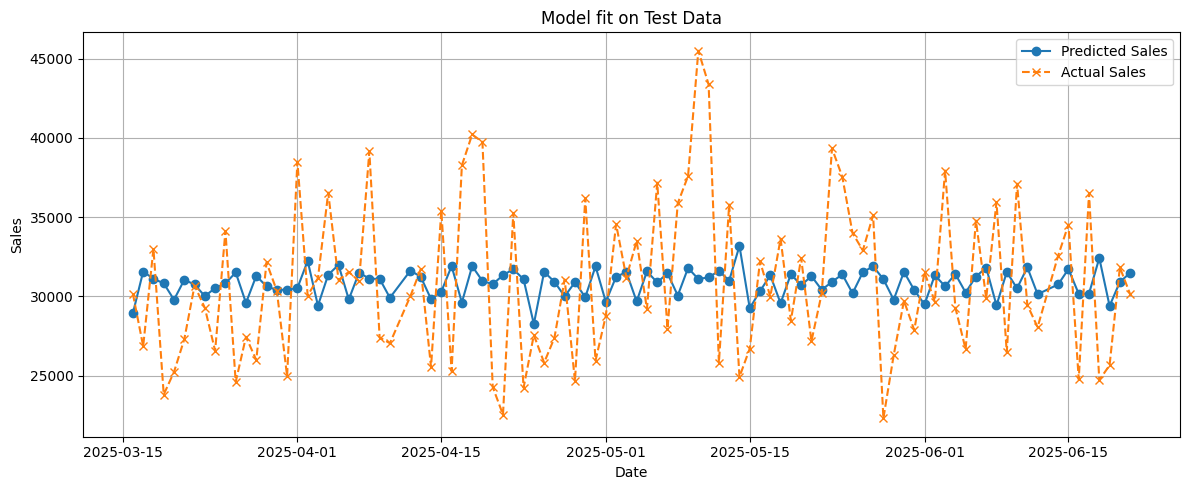

In [20]:
plt.figure(figsize=(12,5))
plt.plot(test_dates, y_pred_denormalized, label='Predicted Sales', marker='o', linestyle='-')
plt.plot(test_dates, test_values, label='Actual Sales', marker='x', linestyle='--')
plt.title('Model fit on Test Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [21]:
mape = MAPE(test_values, y_pred_denormalized)
mape

np.float64(0.13588229106677915)

## V2

In [5]:
X_raw, y_raw = create_dataset_with_cyclic_features(ds, 'sale_date', 'sales', lag=5)

In [6]:
nf = NormalizeFeatures(X_raw)
X_norm = nf.normalize()

In [7]:
X_norm, X_mean, X_std = normalize_features(X_raw)

In [8]:
y_norm = normalize_targets(y_raw)

y_max=67972.8600000019, y_min=352.98, 


In [9]:
X_train, y_train, X_test, y_test = train_test_split(X_norm, y_norm, test_size=0.2)

In [10]:
mlp = MLP(input_size=5, hidden_size=10, learning_rate=0.001)
mlp.train(X_train, y_train, epochs=300)

epoch: 0, | loss: 0.085589
epoch: 10, | loss: 0.009000
epoch: 20, | loss: 0.008946
epoch: 30, | loss: 0.008902
epoch: 40, | loss: 0.008866
epoch: 50, | loss: 0.008837
epoch: 60, | loss: 0.008813
epoch: 70, | loss: 0.008793
epoch: 80, | loss: 0.008776
epoch: 90, | loss: 0.008762
epoch: 100, | loss: 0.008751
epoch: 110, | loss: 0.008741
epoch: 120, | loss: 0.008732
epoch: 130, | loss: 0.008725
epoch: 140, | loss: 0.008718
epoch: 150, | loss: 0.008713
epoch: 160, | loss: 0.008708
epoch: 170, | loss: 0.008704
epoch: 180, | loss: 0.008700
epoch: 190, | loss: 0.008697
epoch: 200, | loss: 0.008694
epoch: 210, | loss: 0.008692
epoch: 220, | loss: 0.008689
epoch: 230, | loss: 0.008687
epoch: 240, | loss: 0.008685
epoch: 250, | loss: 0.008683
epoch: 260, | loss: 0.008681
epoch: 270, | loss: 0.008679
epoch: 280, | loss: 0.008678
epoch: 290, | loss: 0.008676


In [11]:
y_preds = mlp.predict(X_test)

In [12]:
y_min = y_raw.min()
y_max = y_raw.max()

In [13]:
y_pred_denormalized = [pred * (y_max- y_min) + y_min for pred in y_preds]

In [14]:
n = X_norm.shape[0]
stop = int(n - (n * .2))
stop

383

In [15]:
test_dates = [d for d in ds.iloc[stop+5:, :1]['sale_date'].to_list()]

In [16]:
test_values = ds.iloc[stop+5:, :2]['sales'].to_list()

In [18]:
import matplotlib.pyplot as plt

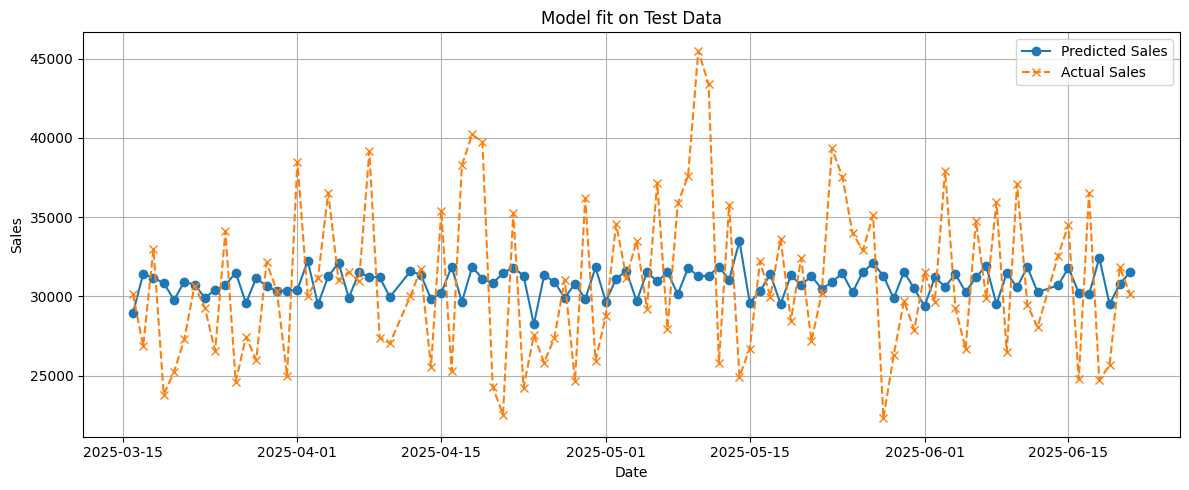

In [19]:
plt.figure(figsize=(12,5))
plt.plot(test_dates, y_pred_denormalized, label='Predicted Sales', marker='o', linestyle='-')
plt.plot(test_dates, test_values, label='Actual Sales', marker='x', linestyle='--')
plt.title('Model fit on Test Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [20]:
mape = MAPE(test_values, y_pred_denormalized)
mape

np.float64(0.13628456760528068)

### forecasting

In [18]:
future_steps = 10
X_future = list(X_norm[-1])

In [19]:
X_future

[np.float64(-1.0126736804032022),
 np.float64(0.9072165076058272),
 np.float64(-1.019252080579924),
 np.float64(-0.8657264999466037),
 np.float64(0.1437556312897925),
 np.float64(1.00313753451416),
 np.float64(0.6102446811489333),
 np.float64(0.001303602041443381),
 np.float64(1.579984292631889)]

In [20]:
type(X_future)

list

In [22]:
X_test

array([[ 1.16444601e+00, -1.10221165e+00, -8.47464430e-01,
         8.19856199e-01, -2.41251324e-01,  1.50366137e+00,
         4.22166938e-02, -9.35334465e-01,  1.57998429e+00],
       [-1.09930629e+00, -8.50859660e-01,  8.19640211e-01,
        -2.41597181e-01, -1.28103581e-01, -1.49948163e+00,
         1.55822291e-01, -9.35334465e-01, -6.32917684e-01],
       [-8.47859386e-01,  8.18006344e-01, -2.42238368e-01,
        -1.28459025e-01, -6.69174473e-01, -9.98957795e-01,
         2.69427889e-01, -9.35334465e-01, -6.32917684e-01],
       [ 8.21636795e-01, -2.44994152e-01, -1.29054891e-01,
        -6.69484075e-01,  3.35982916e-01, -4.98433962e-01,
         3.83033486e-01, -9.35334465e-01, -6.32917684e-01],
       [-2.41765099e-01, -1.31691092e-01, -6.70296665e-01,
         3.35588153e-01, -1.16750567e+00,  2.08986986e-03,
         4.96639084e-01, -9.35334465e-01, -6.32917684e-01],
       [-1.28419254e-01, -6.73504710e-01,  3.35178176e-01,
        -1.16777305e+00, -9.34200761e-01,  5.026137

In [8]:
s = tx.Series([4,5,6,0,1], name='test')
print(s)

0   4
1   5
2   6
3   0
4   1
Name: test, dtype: int
